## 2B - L1: Hough Transform: Lines

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

##### Load the img

In [2]:
img = cv2.imread("data/chess-board.jpg")

In [3]:
img.shape

(2021, 3032, 3)

##### Resize the Img

In [4]:
h, w, _ = img.shape

In [5]:
dim = (w//2, h//2)

In [6]:
img = cv2.resize(img, dim)

In [7]:
img.shape

(1010, 1516, 3)

##### Select a single channel

In [8]:
img = img[:, :, 1]

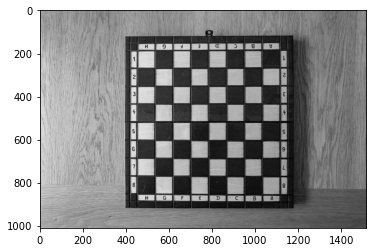

In [9]:
plt.imshow(img, cmap="gray")

### Canny Edge Detection

In [10]:
from skimage import feature

In [11]:
high_threshold = 200
low_threshold = 150

In [12]:
edges = feature.canny(img, 0.5, low_threshold, high_threshold)

Text(0.5, 1.0, 'Canny Edge Detection')

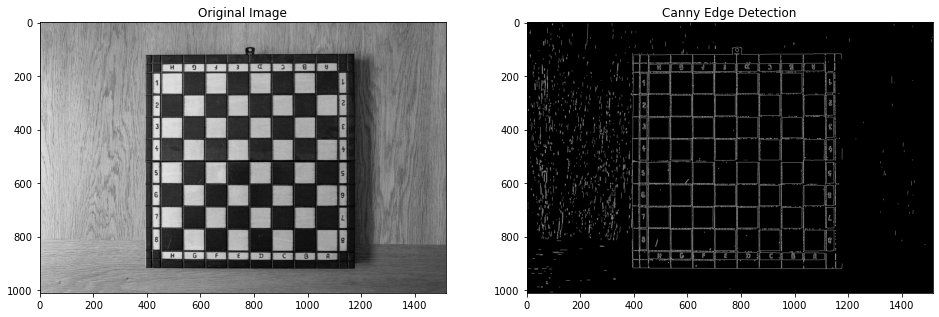

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].imshow(img, cmap="gray")
ax[0].set_title("Original Image")

ax[1].imshow(edges, cmap="gray")
ax[1].set_title("Canny Edge Detection")

### Hough Line Fitting

In [14]:
from skimage.transform import hough_line, hough_line_peaks
import numpy as np

import matplotlib.pyplot as plt

In [15]:
# define theta range
theta_range = np.linspace(-np.pi/2, np.pi/2, 360, endpoint=False)

In [16]:
h, theta, d = hough_line(edges, theta=theta_range)

#### Plot the Hough Space

Text(0, 0.5, 'd')

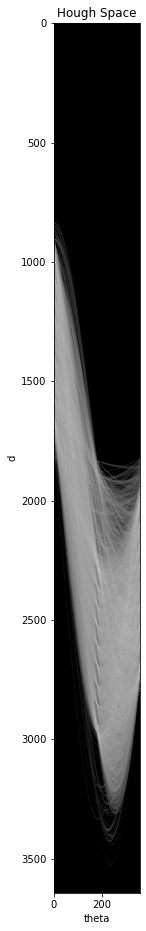

In [17]:
plt.figure(figsize=(8, 16))
plt.imshow(np.log(1 + h), cmap="gray") # no idea why we're applying log
plt.title("Hough Space")
plt.xlabel("theta")
plt.ylabel("d")

#### Plot detected lines

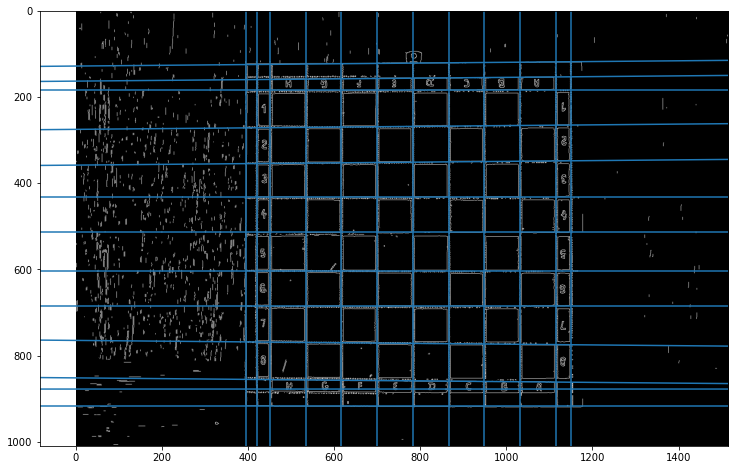

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

ax.imshow(edges, cmap="gray")
for _, angle, dist in zip(*hough_line_peaks(h, theta, d, threshold=150, min_distance=20)):
    
    # using the hough_line_peaks function, we can get the peak d, theta value.
    # remember, in parametric form, x  = d.cos(theta), y = d.sin(theta)
    # we can also get the slope using theta; slope = tan(theta)
    # using the above information, we can fit the lines
    
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)]) # x  = d.cos(theta), y = d.sin(theta)
    ax.axline((x0, y0), slope=np.tan(angle + np.pi/2)) # slope = tan(theta)


##### Perfect!

We can adjust 'threshold' and 'min_distance parameters' to get required results